In [169]:
from matplotlib import style
style.use('seaborn-v0_8-whitegrid')
from sympy import symbols, Eq, solve
from sympy.plotting import plot, plot_implicit
from sympy.physics import units as u


<img src="images/cosySec.png" width="340" height="204" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />
<div style="text-align: center; margin-top: 10px;"><b><i>BMW - X1 xDRIVE28i 4DR SUV</i></b></div>

    """
    Your student number is: s234229
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    Your car is an: BMW X1 xDRIVE28i 4DR SUV
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    Length: L = 4.44m
    Width: W = 1.82m
    Height: H = 1.61m
    Mass: M = 1660kg
    Clearance: C = 0.183m
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    """

>1. Sketch and parameters


<img src="images/sketch.png" width="600" style="display: block; margin-left: auto; margin-right: auto; border-radius: 8px;" />
<div style="text-align: center; margin-top: 10px;"><b><i>Sketch of system</i></b></div>

> 2. List of known and unknown parameters
Known parameters:

* $g = 9.81 \textrm{m/s}^2$
* $L = 4.44 \textrm{m}$
* $W = 1.82 \textrm{m}$
* $H = 1.61 \textrm{m}$
* $M = 1660 \textrm{kg}$
* $C = 0.183 \textrm{m}$
* $\mu = 0.6$

Unknown parameters:

$V_1$, $V_2$, $F_g$, $F_b$, $F_f$ and $F_x$

> 3. Relevant assumptions and relevant equations

Assumptions
* Steady flow
* Constant speed: $|V_0| = |V_1|$
* Uniform velocity
* Incompressible
* Atmospheric pressure everywhere
* $F_{Bg_x}=0$

Equations
* Conservation of Momentum
$$0= \xcancel{\frac{\partial}{\partial t}\int_{CV} u \rho dV} + \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$$

>4. Equations and determination at what water depth the car will start to float.

$F_b = \rho g V, V = WLH$

$F_g = m g$

$\sum F = F_b - F_g = 0$

In [251]:
# Constants
g = 9.81*u.m/u.s**2 # m/s^2
L = 4.44*u.m # m
W = 1.82*u.m # m
C = 0.183*u.m # m
c = 0.183 # m
H = 1.61*u.m # m
h = 1.61 # m
M = 1660*u.kg # kg
rho = 1000*u.kg/u.m**3 # kg/m^3
mu = 0.6 # wet asphalt

In [253]:
z = symbols('z')
V = L*W*(z-C) # m^3
Fb = rho*g*V # N
Fg = M*g # N
H0 = solve(Fb-Fg,z)[0].evalf(3)
u.convert_to(H0,u.cm)

38.8*centimeter

>5. control volume analysis to determine an expression for the critical velocity

Friction:

$\sum F = F_n -F_g   = 0 \Rightarrow F_g = F_n = mg $

$F_f = F_n \mu = mg\mu$

Surface force:

$F_{b_x}=0 \Rightarrow$

$\sum F_x = F_s + \xcancel{F_b} = \frac{\partial}{\partial t}\int_{CV} u \rho dV + \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

Steady flow: $\frac{\partial}{\partial t}=0 \Rightarrow$

$\sum F_x = F_s = \xcancel{\frac{\partial}{\partial t}\int_{CV} u \rho dV} + \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

$F_s = \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

Uniform distrobution:

$\int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA = \sum_{CS} u \rho \bar{v} \bullet \bar{A}$

$v_x = |\bar{v}| = u \Rightarrow$

$F_x =\sum_{CS} u \rho v_x  A=\rho u^2 A$

Critical velocity when

$F_x - F_f  =\rho u^2 A -mg\mu=0 \Rightarrow$

$u = \sqrt{\frac{mg\mu}{\rho A}}$

In [262]:
Ff = M*g*mu # N

v, z = symbols('v z')
A = W*(z-C) # m^2

Fx = rho*v**2*A
vc = lambda x : solve(Fx-Ff,v)[1].subs(z,x).simplify()

display(vc(C),vc(H).evalf(3))

# remove unit to plot
plot_vel = vc(z*u.m).subs(u.m/u.s,1)

zoo

1.94*meter/second

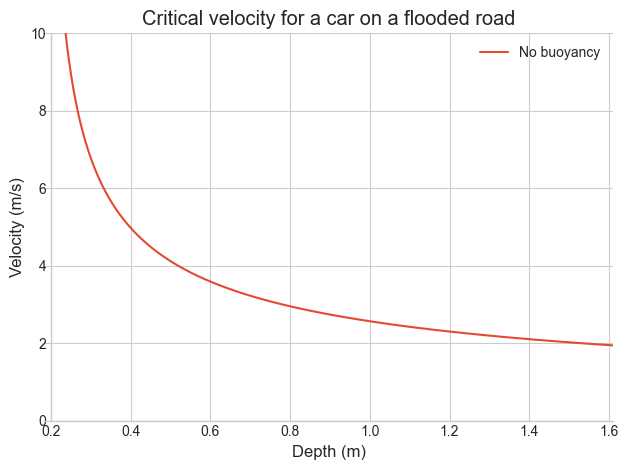

In [255]:
#
p = plot(plot_vel, (z,0,2),xlim=(c,h),ylim=(0,10),axis_center=(0.2,0),label=["No buoyancy"], show=False)
p.title = 'Critical velocity for a car on a flooded road'
p.xlabel = 'Depth (m)'
p.ylabel = 'Velocity (m/s)'
p.legend = True
# DPI settings of plot
p.show()

> 6. Same analysis as in step 5, but the influence of buoyancy is included

Friction:

$\sum F = F_n + F_b - F_g = 0 \Rightarrow F_n = F_g - F_b = mg - F_b $

$F_f = F_n \mu = (mg - F_b) \mu$

Surface force:

$F_{b_x}=0 \Rightarrow$

$\sum F_x = F_s + \xcancel{F_b} = \frac{\partial}{\partial t}\int_{CV} u \rho dV + \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

Steady flow: $\frac{\partial}{\partial t}=0 \Rightarrow$

$\sum F_x = F_s = \xcancel{\frac{\partial}{\partial t}\int_{CV} u \rho dV} + \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

$F_s = \int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA$

Uniform distrobution:

$\int_{CS} u \rho (\bar{v}\bullet \bar{n}) dA = \sum_{CS} u \rho \bar{v} \bullet \bar{A}$

In [256]:
v, z = symbols('v z')

# Normal force
Fg = M*g

# Buoyancy force
A = W*(z-C) # m^2
V = L*A # m^3
Fb = rho*g*V # N

# Friction force
Ff = (Fg-Fb)*mu # N


Fs = rho*v**2*A
vc = lambda x : solve(Fs-Ff,v)[0].subs(z,x).simplify()
display(vc(C),vc(H).evalf(3))

# remove unit to plot
plot_vel_b = vc(z*u.m).subs(u.m/u.s,1)

zoo

4.73*I*meter/second

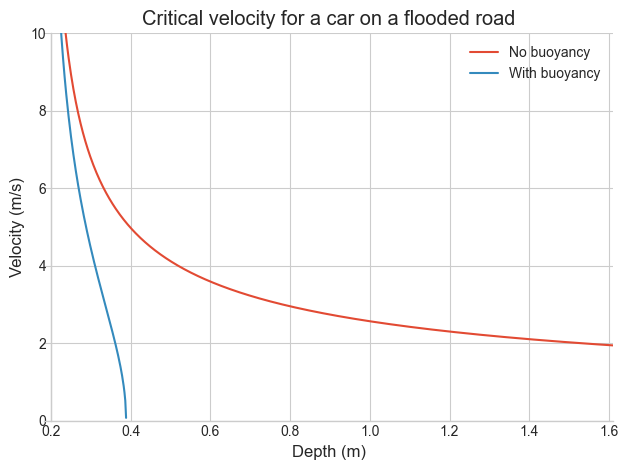

In [257]:
#
p = plot(plot_vel, plot_vel_b, (z,0,2),xlim=(c,h),ylim=(0,10),axis_center=(0.2,0),label=["No buoyancy","With buoyancy"], show=False)
p.title = 'Critical velocity for a car on a flooded road'
p.xlabel = 'Depth (m)'
p.ylabel = 'Velocity (m/s)'
p.legend = True
# DPI settings of plot
p.show()

> 7.  at what flow velocity the car will start to float and move horizontally at the same time

In [263]:
# Critical velocity when
vc(H0).evalf(3)


5.11*meter/second